#Introduction: Climate Change Belief Analysis

##Team 17 - Classification Predict

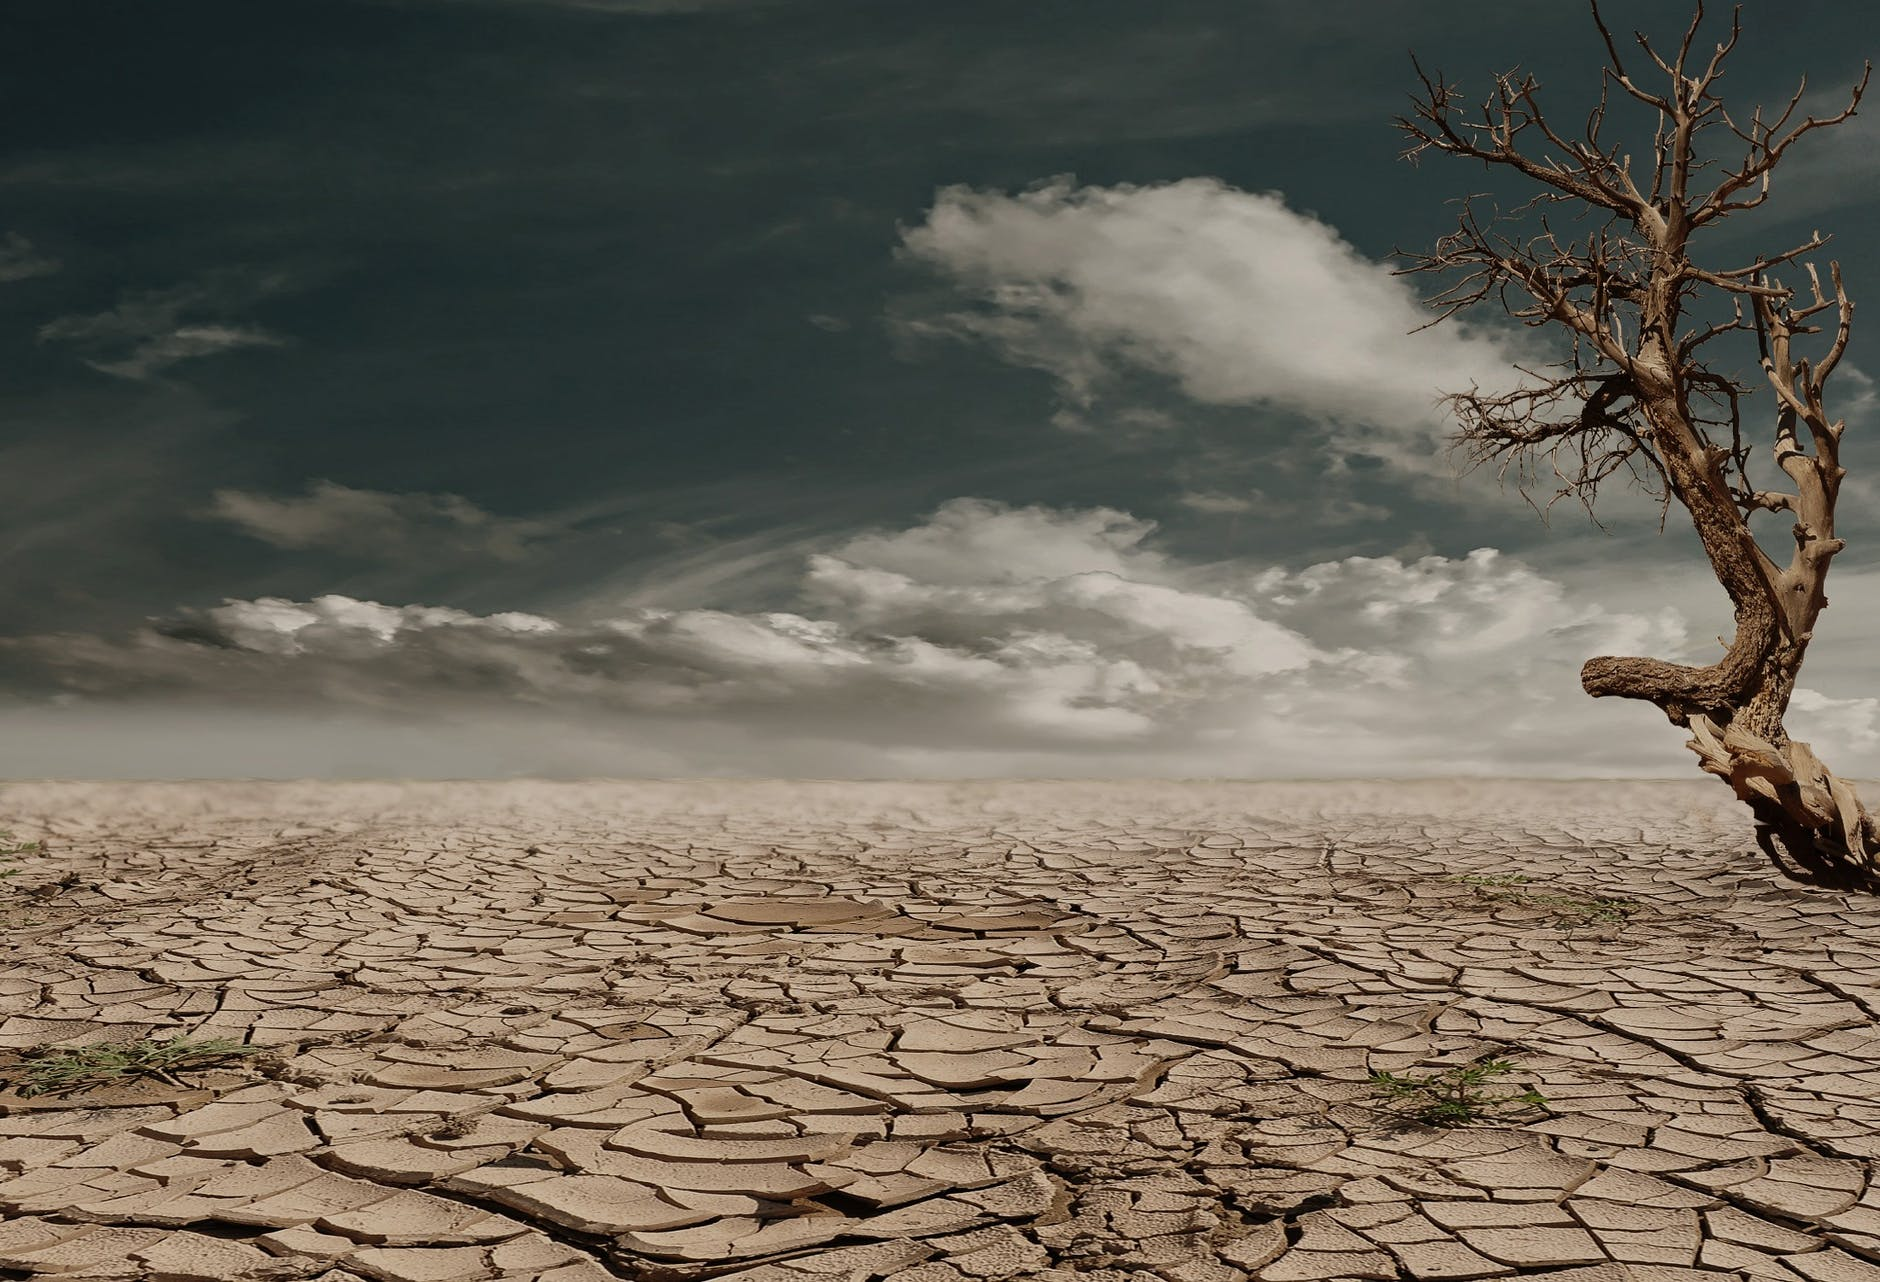

##What is Climate?
The average pattern for weather conditions occurs over a long time period. Weather refers to the atmospheric conditions at a specific place at a specific point in time. Climate has always varied because of natural causes. Increasingly, however, human increases in GHG emissions causing changes in climate as well.
##What is Climate Change?
Changes in global or regional climate patterns, including changes in temperature, wind patterns, and rainfall. In particular, climate change refers to a change apparent from the mid to late 20th century onwards and attributed largely to human activities that increase levels of GHG emissions, especially atmospheric carbon dioxide produced by the use of fossil fuels. Climate change is sometimes referred to as global warming, which specifically refers to the long-term trend of a rising average global temperature.
##Predict Overview
Governments have a huge role to play when it comes to climate change. The adverse effects of climate change on the environment have implications for the general welfare of the public.
We were tasked to create a Machine Learning model that is able to classify the sentiment of a person on matters of climate change based on tweets posted. Accurate classification of this will help the government understand its population better and how it can improve to better the lives of its citizens.
Companies too can leverage this information to better understand how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.
The structure of this notebook is as follows:

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. The Dataset</a>

<a href=#three>3. Text Pre-processing & Data Cleaning</a>

<a href=#three>4. Exploratory Data Analysis (EDA)</a>

<a href=#four>5. Dealing with Imbalanced Data</a>

<a href=#five>6. Feature Extraction</a>

<a href=#five>7. Modeling</a>

<a href=#seven>8. File Submission</a>



 <a id="one"></a>
## 1.0 Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
Description: We import the necessary libraries needed for Data Analysis, Data Visualization, Data Pre-processing, Feature Engineering, and Model Building.




In [3]:
# !pip install scikit-plot

In [4]:
import scikitplot as skplt

%matplotlib inline
## for data
import pandas as pd
import numpy as np
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from collections import  Counter
## for processing
import re
import nltk
from nltk.corpus import stopwords

# for bag-of-words
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing
# for word embedding
import gensim
import gensim.downloader as gensim_api

#Data Imbalance
from sklearn.utils import resample

#Feature Eng
from tqdm import tqdm 
tqdm.pandas(desc="progress-bar") 
from gensim.models.doc2vec import LabeledSentence

#Encoding
from sklearn.preprocessing import LabelEncoder

#Algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline



#Grid Search
from sklearn.model_selection import GridSearchCV

#Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score


# Warnings
import warnings 

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

warnings.filterwarnings('ignore')

In [5]:
url_train = 'https://raw.githubusercontent.com/kabirodavies/ML_classification/main/train.csv'
url_test = 'https://raw.githubusercontent.com/kabirodavies/ML_classification/main/test.csv'
url_sub = 'https://raw.githubusercontent.com/kabirodavies/ML_classification/main/sample_submission.csv'


 <a id="one"></a>
## 2.0 The Dataset
<a href=#cont>Back to Table of Contents</a>

---
    
 Description: Load Train and Test datasets from the github repository

Data The collection of this data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo. The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015, and Feb 21, 2018. In total, 43943 tweets were collected. Each tweet is labeled as one of the following classes:

##Class Description:
 

*  2--- News: the tweet links to factual news about climate change
*  1--- Pro: the tweet supports the belief of man-made climate change
*  0--- Neutral: the tweet neither supports nor refutes the belief of man-made climate change
* -1--- Anti: the tweet does not believe in man-made climate change

##Columns:

*   sentiment: Sentiment of tweet i.e 0, 1, etc
*   message: Tweet body
*   tweetid: Twitter unique id








### Read the data from Train and Test dataframes

In [6]:
#Read the train data
train = pd.read_csv(url_train)
train.head()

,sentiment,message,tweetid
0,1,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",625221
1,1,It's not like we lack evidence of anthropogenic global warming,126103
2,2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",466954


In [7]:
#Read the train data
test = pd.read_csv(url_test)
test.head()

,message,tweetid
0,Europe will now be looking to China to make sure that it is not alone in fighting climate change… https://t.co/O7T8rCgwDq,169760
1,Combine this with the polling of staffers re climate change and womens' rights and you have a fascist state. https://t.co/ifrm7eexpj,35326
2,"The scary, unimpeachable evidence that climate change is already here: https://t.co/yAedqcV9Ki #itstimetochange #climatechange @ZEROCO2_;..",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPutin got to you too Jill ! \nTrump doesn't believe in climate change at all \nThinks it's s hoax,476263
4,RT @FakeWillMoore: 'Female orgasms cause global warming!'\n-Sarcastic Republican,872928


In [8]:
#shape of train and test data
train.shape, test.shape

((15819, 3), (10546, 2))

In [9]:
train.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


### To ease text cleaning, we're going to combine train and test data

In [11]:
combi = train.append(test, ignore_index=True, sort=True)
combi.shape

(26365, 3)

<a id="one"></a>
## 3.0 Text Pre-processing & Data Cleaning
<a href=#cont>Back to Table of Contents</a>

---
    
Description: Real world data is messy. This step is all about removing the noice from data. With the use of regualr expressions we can remove unwanted charecters which include: Emojis, digits, RT for retweets, Hashtags, symbols like @, !, $, &, urls.

Text preprocessing is a method to clean the text data and make it ready to feed data to the model.




###Expand Contractions

In [12]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

In [13]:
# Regular expression for finding contractions
contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))

In [14]:
# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

In [15]:
# Expanding Contractions in the reviews
combi['message_contract']=combi['message'].apply(lambda x:expand_contractions(x))

In [16]:
#Remove Emoji
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [17]:
combi["clean_message"] = combi.message_contract.apply(remove_emoji)

In [18]:
#Removing Short Words
combi["clean_message"] = combi.message_contract.apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))
combi.head(10)

,message,sentiment,tweetid,message_contract,clean_message
0,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",1.0,625221,"PolySciMajor EPA chief does not think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable","PolySciMajor EPA chief does not think carbon dioxide main cause global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable"
1,It's not like we lack evidence of anthropogenic global warming,1.0,126103,It is not like we lack evidence of anthropogenic global warming,not like lack evidence anthropogenic global warming
2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,2.0,698562,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,@RawStory: Researchers say have three years act climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…
3,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,1.0,573736,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,#TodayinMaker# WIRED 2016 was pivotal year the war climate change https://t.co/44wOTxTLcD
4,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",1.0,466954,"RT @SoyNovioDeTodas: It is 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight","@SoyNovioDeTodas: 2016, and racist, sexist, climate change denying bigot leading the polls. #ElectionNight"
5,Worth a read whether you do or don't believe in climate change https://t.co/ggLZVNYjun https://t.co/7AFE2mAH8j,1.0,425577,Worth a read whether you do or do not believe in climate change https://t.co/ggLZVNYjun https://t.co/7AFE2mAH8j,Worth read whether you not believe climate change https://t.co/ggLZVNYjun https://t.co/7AFE2mAH8j
6,RT @thenation: Mike Pence doesn’t believe in global warming or that smoking causes lung cancer. https://t.co/gvWYaauU8R,1.0,294933,RT @thenation: Mike Pence doesn’t believe in global warming or that smoking causes lung cancer. https://t.co/gvWYaauU8R,@thenation: Mike Pence doesn’t believe global warming that smoking causes lung cancer. https://t.co/gvWYaauU8R
7,"RT @makeandmendlife: Six big things we can ALL do today to fight climate change, or how to be a climate activistÃ¢â‚¬Â¦ https://t.co/TYMLu6DbNM hÃ¢â‚¬Â¦",1.0,992717,"RT @makeandmendlife: Six big things we can ALL do today to fight climate change, or how to be a climate activistÃ¢â‚¬Â¦ https://t.co/TYMLu6DbNM hÃ¢â‚¬Â¦","@makeandmendlife: Six big things can ALL today fight climate change, how climate activistÃ¢â‚¬Â¦ https://t.co/TYMLu6DbNM hÃ¢â‚¬Â¦"
8,"@AceofSpadesHQ My 8yo nephew is inconsolable. He wants to die of old age like me, but will perish in the fiery hellscape of climate change.",1.0,664510,"@AceofSpadesHQ My 8yo nephew is inconsolable. He wants to die of old age like me, but will perish in the fiery hellscape of climate change.","@AceofSpadesHQ 8yo nephew inconsolable. wants die old age like me, but will perish the fiery hellscape climate change."
9,RT @paigetweedy: no offense… but like… how do you just not believe… in global warming………,1.0,260471,RT @paigetweedy: no offense… but like… how do you just not believe… in global warming………,@paigetweedy: offense… but like… how you just not believe… global warming………


In [19]:
nltk.download(['punkt','stopwords', 'wordnet'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [20]:
lst_stopwords = nltk.corpus.stopwords.words("english")

def utils_preprocess_text(message, flg_stemm=False, flg_lemm=True, lst_stopwords='english'):

  '''
Preprocess a string.
:parameter
    :param text: string - name of column containing text
    :param lst_stopwords: list - list of stopwords to remove
    :param flg_stemm: bool - whether stemming is to be applied
    :param flg_lemm: bool - whether lemmitisation is to be applied
:return
    cleaned text
'''
  text = re.sub(r'[^\w\s]', '', str(message).lower().strip())
  text = re.sub(r'@[A-Za-z0-9]+', '', text) # Remove @mentions
  text = re.sub(r'#', '', text) # Remove '#' symbol
  text = re.sub(r':', '', text) # Remove ':' symbol
  text = re.sub(r'rt[\s]+', '', text) #Remove RT
  text = re.sub(r'https?:\/\/\S+', '', text) # Remove hyperlink
  text = re.sub(r'\w*\d\w*', '', text) # Remove numbers
  text = re.sub('http\S+|www.\S+', '', text)
  text = re.sub(r'[^A-Za-z ]', '', text)
  text = re.sub(r'‘[A-Z][^A-Z]*’', '', text)
  
  text = re.sub(r'\w*\d\w*','', text) # Remove digits and words containing digits
  text = re.sub(r' +',' ', text) #Revove extra spaces
  

  text = re.sub('[.?]', '', text)
  text = re.sub('https?://\S+|www.\S+', '', text)
  text = re.sub('<.?>+', '', text)
  text = re.sub('\n', '', text)
  text = re.sub('\w\d\w', '', text)
    

              
  ## Tokenize (convert from string to list)
  lst_text = text.split()
  ## remove Stopwords
  if lst_stopwords is not None:
      lst_text = [word for word in lst_text if word not in 
                  lst_stopwords]
              
  ## Stemming (remove -ing, -ly, ...)
  if flg_stemm == True:
      ps = nltk.stem.porter.PorterStemmer()
      lst_text = [ps.stem(word) for word in lst_text]
              
  ## Lemmatisation (convert the word into root word)
  if flg_lemm == True:
      lem = nltk.stem.wordnet.WordNetLemmatizer()
      lst_text = [lem.lemmatize(word) for word in lst_text]
          
  ## back to string from list
  text = " ".join(lst_text)
  return text

In [21]:
combi["clean_message"] = combi["message_contract"].apply(lambda x: 
          utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, 
          lst_stopwords=lst_stopwords))

combi.head()

,message,sentiment,tweetid,message_contract,clean_message
0,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",1.0,625221,"PolySciMajor EPA chief does not think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",polyscimajor epa chief think carbon dioxide main cause global warming wait via mashable
1,It's not like we lack evidence of anthropogenic global warming,1.0,126103,It is not like we lack evidence of anthropogenic global warming,like lack evidence anthropogenic global warming
2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,2.0,698562,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,rawstory researcher say three year act climate change late
3,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,1.0,573736,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,todayinmaker wired pivotal year war climate change
4,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",1.0,466954,"RT @SoyNovioDeTodas: It is 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",soynoviodetodas racist sexist climate change denying bigot leading poll electionnight


<a id="one"></a>
## 4.0 Exploratory Data Analysis(EDA)
<a href=#cont>Back to Table of Contents</a>

---

Description:
Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns, to spot anomalies, to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

In [22]:
# Separating dataframes
train_df = combi.iloc[:15819,:]
test_df = combi.iloc[15819:,:]

In [23]:
#Distribution of the Sentiment Column
train_df['sentiment'].value_counts()

 1.0    8530
 2.0    3640
 0.0    2353
-1.0    1296
Name: sentiment, dtype: int64

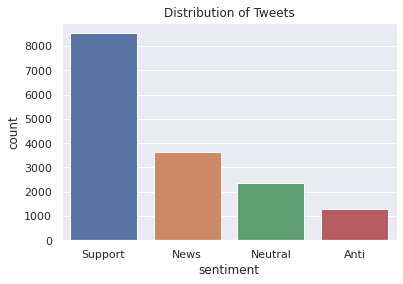

In [24]:
#Distribution of tweets
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="sentiment", data=train_df,
                order=train_df['sentiment'].value_counts().index)
ax.set(xticklabels = (['Support', 'News', 'Neutral', 'Anti']))
plt.title('Distribution of Tweets')
None #don't show the label objects

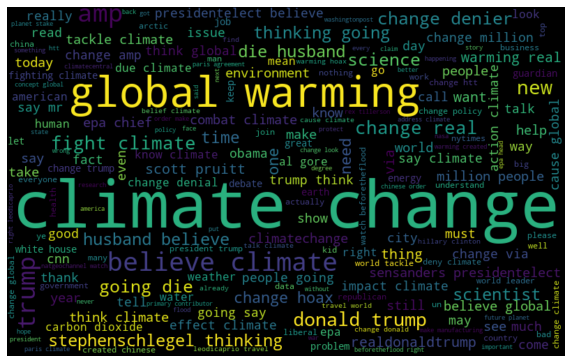

In [25]:
#Most common words in the train data
all_words = ' '.join([text for text in train_df['clean_message']]) 

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

###Visual representation of most used words in the four classes of tweets

####a. support sentiment

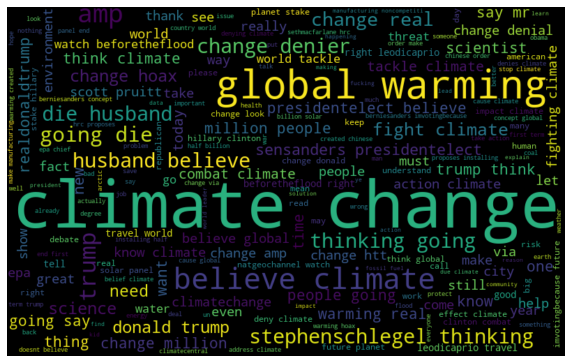

In [26]:
#Most common words in the train data from support sentiment
all_words = ' '.join([text for text in train_df['clean_message'][train_df['sentiment']==1]]) 

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

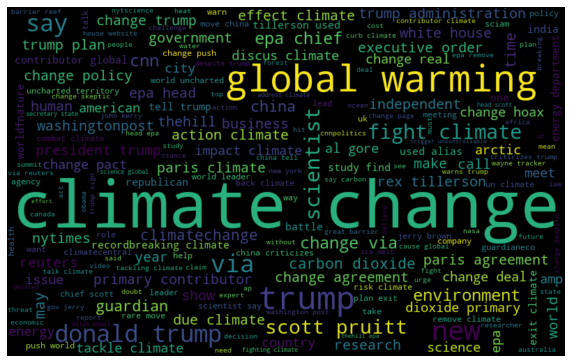

In [27]:
#Most common news words
all_words = ' '.join([text for text in train_df['clean_message'][train_df['sentiment']==2]]) 

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

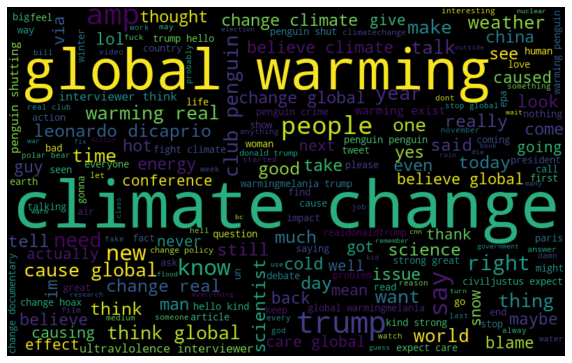

In [28]:
#Most common neutral words
all_words = ' '.join([text for text in train_df['clean_message'][train_df['sentiment']==0]]) 

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

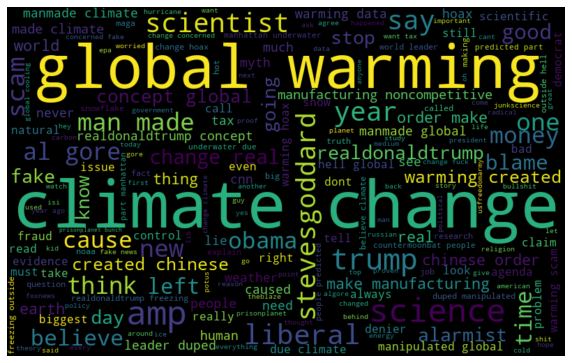

In [29]:
#Most common anti climate change words
all_words = ' '.join([text for text in train_df['clean_message'][train_df['sentiment']==-1]]) 

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

Already we can see some words occu frequently used across all classes such as 'climate', 'change', 'global', 'warming'. This is relevant as we are investigating climate change.

###Hashtags are important and can be used to effect change and used to voice the opinions of many. We want to understand what type of hashtags are most used across the different segments.



In [30]:
#Extract Hashtag
def hashtag_extract(tweets):
  hashtags = []
  for tweet in tweets:
    ht = re.findall(r'#(\w+)', tweet)
    hashtags.append(ht)
  return hashtags


In [31]:
#Extract hashtags from anti climate change tweets
ht_negative = hashtag_extract(train_df['message'][train_df['sentiment']==-1])

#Extract hashtags from neutral climate change tweets
ht_neutral = hashtag_extract(train_df['message'][train_df['sentiment']==0])

#Extract hashtags from positive climate change tweets
ht_positive = hashtag_extract(train_df['message'][train_df['sentiment']==1])

#Extract hashtags from news climate change tweets
ht_news = hashtag_extract(train_df['message'][train_df['sentiment']==2])

In [32]:
ht_positive = sum(ht_positive,[])
ht_negative = sum(ht_negative, [])
ht_neutral = sum(ht_neutral, [])
ht_news = sum(ht_news, [])

In [33]:
ht_positive[:10]

['TodayinMaker',
 'ElectionNight',
 'climatemarch',
 'SaveOurPlanet',
 'COP22',
 'EarthToMarrakech',
 'climateÃ',
 'ObamaUNC',
 'cdnpoli',
 'JohnHoldren']

In [34]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,TodayinMaker,1
1,ElectionNight,8
2,climatemarch,6
3,SaveOurPlanet,1
4,COP22,59


In [35]:
#Dict from NLTK to process Hashtags
freq_positive = nltk.FreqDist(ht_positive)
freq_negative = nltk.FreqDist(ht_negative)
freq_news = nltk.FreqDist(ht_news)
freq_neutral = nltk.FreqDist(ht_neutral)

#Dataframe for Positive Hashtags
positive_tags = pd.DataFrame({'Hashtag': list(freq_positive.keys()),
                 'Count': list(freq_positive.values())})

#Dataframe for Negative Hashtags
negative_tags = pd.DataFrame({'Hashtag': list(freq_negative.keys()),
                 'Count': list(freq_negative.values())})

#Dataframe for News Hashtags
news_tags = pd.DataFrame({'Hashtag': list(freq_news.keys()),
                 'Count': list(freq_news.values())})

#Dataframe for Neutral Hashtags
neutral_tags = pd.DataFrame({'Hashtag': list(freq_neutral.keys()),
                 'Count': list(freq_neutral.values())})

In [36]:
positive_tags

,Hashtag,Count
0,TodayinMaker,1
1,ElectionNight,8
2,climatemarch,6
3,SaveOurPlanet,1
4,COP22,59
...,...,...
1250,Turkey,1
1251,Geeky0001,1
1252,LeoDiCaprio,1
1253,FL26,1


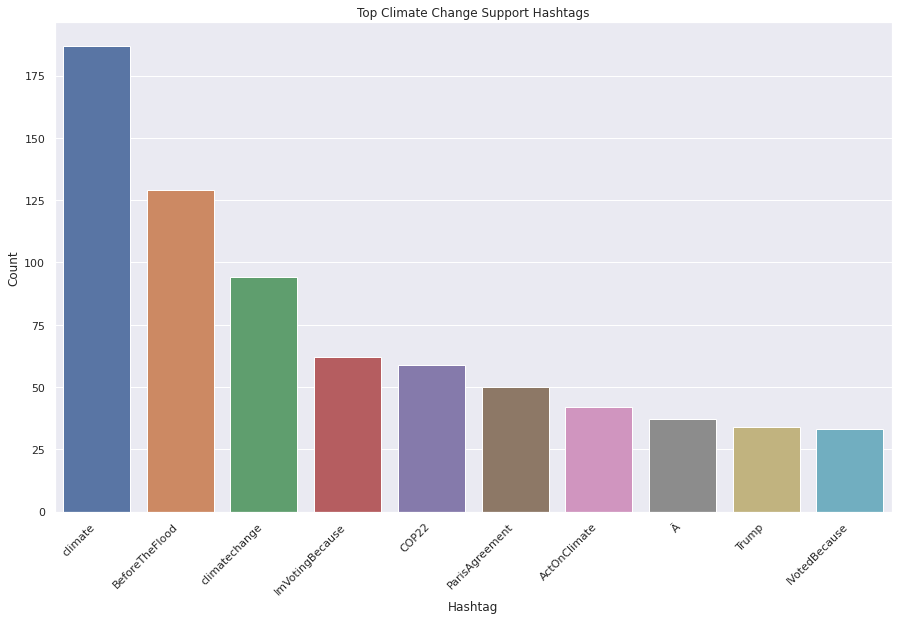

In [37]:
# select top 10 positive hashtags
positive_tags = positive_tags.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
chart = sns.barplot(
    data=positive_tags,
    x='Hashtag', y='Count'
)
plt.title('Top Climate Change Support Hashtags')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

None #don't show the label objects

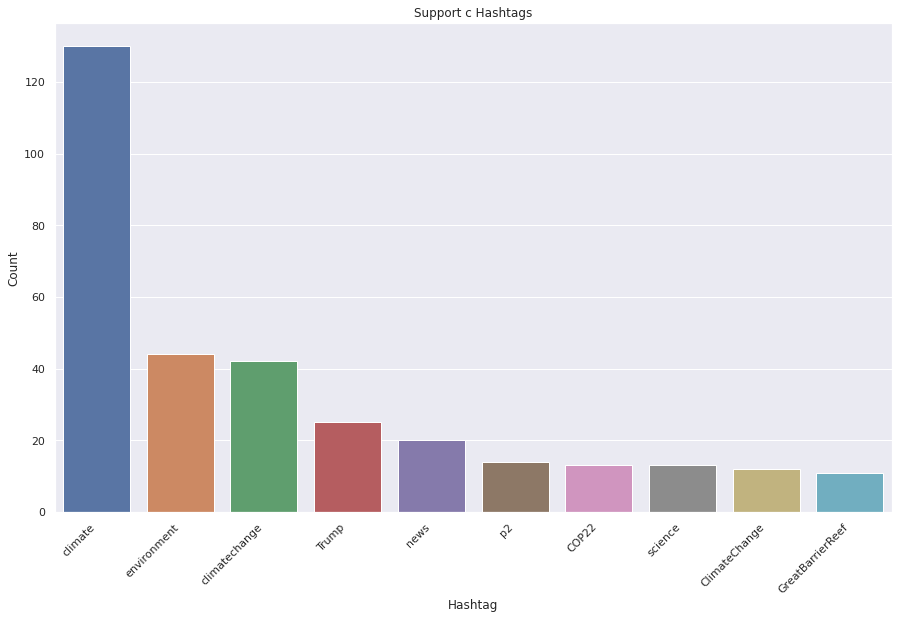

In [38]:
# select top 10 news hashtags
news_tags = news_tags.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
chart = sns.barplot(
    data=news_tags,
    x='Hashtag', y='Count'
)
plt.title('Support c Hashtags')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

None #don't show the label objects

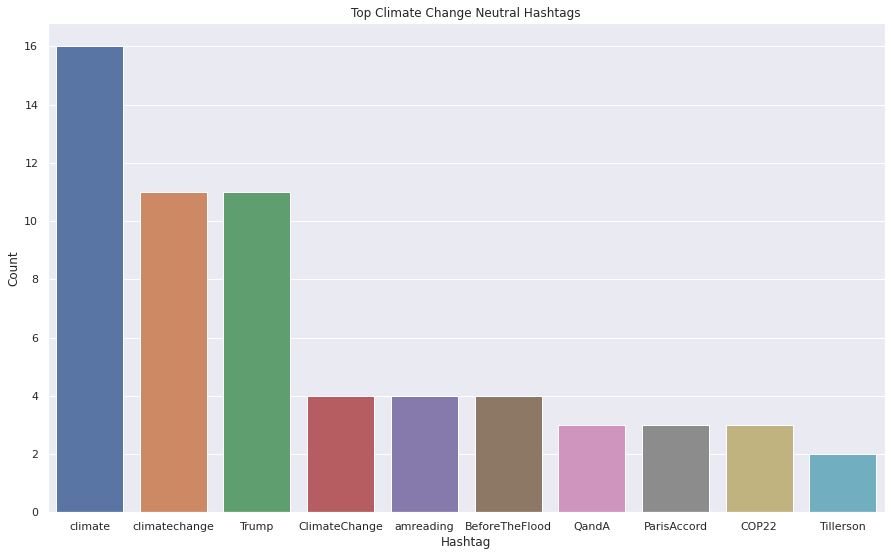

In [39]:
# select top 10 neutral hashtags
neutral_tags = neutral_tags.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=neutral_tags, x='Hashtag', y='Count')
plt.title('Top Climate Change Neutral Hashtags')
plt.show()

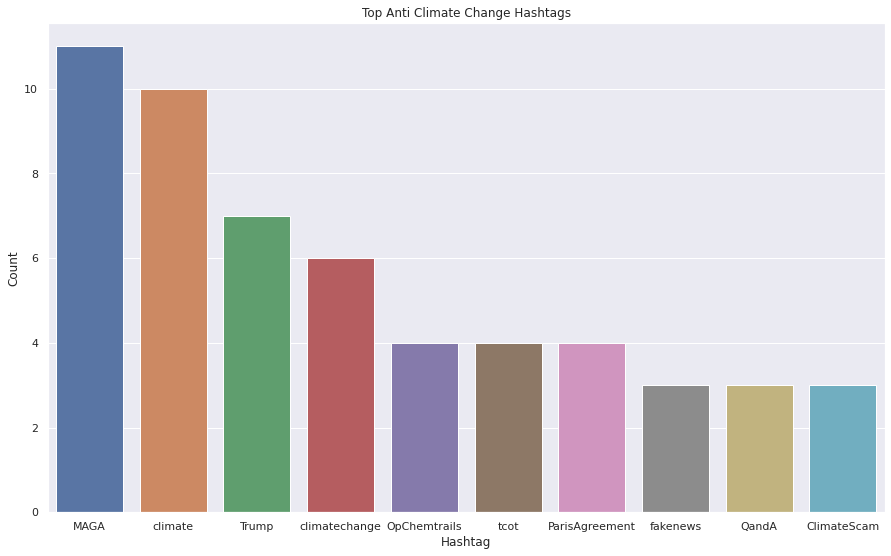

In [40]:
# select top 10 anti climate change hashtags
negative_tags = negative_tags.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=negative_tags, x='Hashtag', y='Count')
plt.title('Top Anti Climate Change Hashtags')

plt.show()

####We can see hashtags such as climate and trump are used across all classes. We can also see the choice of hashtags on different classes like 'climatescam', 'fakenews' for those in support of climate change and 'beforetheflood', 'iamvotingbecause' for those in support of climate change.

##Frequency of words by sentiment

In [41]:
train_df['text_n_chars'] = train_df.clean_message.apply(len)  # count all chars in each sentence

In [42]:
train_df['text_n_words'] = train_df.clean_message.apply(lambda sent: len(sent.split()))  # count number of words in each sentence
train_df.head()

,message,sentiment,tweetid,message_contract,clean_message,text_n_chars,text_n_words
0,"PolySciMajor EPA chief doesn't think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",1.0,625221,"PolySciMajor EPA chief does not think carbon dioxide is main cause of global warming and.. wait, what!? https://t.co/yeLvcEFXkC via @mashable",polyscimajor epa chief think carbon dioxide main cause global warming wait via mashable,87,13
1,It's not like we lack evidence of anthropogenic global warming,1.0,126103,It is not like we lack evidence of anthropogenic global warming,like lack evidence anthropogenic global warming,47,6
2,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,2.0,698562,RT @RawStory: Researchers say we have three years to act on climate change before it’s too late https://t.co/WdT0KdUr2f https://t.co/Z0ANPT…,rawstory researcher say three year act climate change late,58,9
3,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,1.0,573736,#TodayinMaker# WIRED : 2016 was a pivotal year in the war on climate change https://t.co/44wOTxTLcD,todayinmaker wired pivotal year war climate change,50,7
4,"RT @SoyNovioDeTodas: It's 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",1.0,466954,"RT @SoyNovioDeTodas: It is 2016, and a racist, sexist, climate change denying bigot is leading in the polls. #ElectionNight",soynoviodetodas racist sexist climate change denying bigot leading poll electionnight,85,10


In [43]:
train_df['sentiment'].value_counts()

 1.0    8530
 2.0    3640
 0.0    2353
-1.0    1296
Name: sentiment, dtype: int64

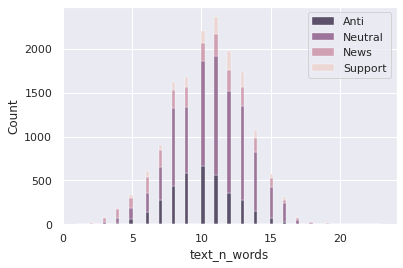

In [44]:
# The distribution of number of words for each sentiment
sns.histplot(data=train_df, x='text_n_words',
             hue='sentiment', multiple='stack', color='seagreen')
plt.legend(labels=['Anti', 'Neutral', 'News', 'Support'])
None #don't show the label objects

In [45]:
# Most frequent words. In whole Text.
words = [word for sent in train_df['clean_message'] for word in sent.split()]
words[:10]  # words without sorting

['polyscimajor',
 'epa',
 'chief',
 'think',
 'carbon',
 'dioxide',
 'main',
 'cause',
 'global',
 'warming']

In [46]:
# sort words descending order
freq_words = Counter(words)
freq_words_sorted = sorted(freq_words.items(), key=lambda pair: pair[1], reverse=True)
freq_words_df = pd.DataFrame(freq_words_sorted[:20], columns=['word', 'counts'])
freq_words_df.head(10)

,word,counts
0,climate,12916
1,change,12512
2,global,3771
3,warming,3456
4,trump,2385
5,believe,1158
6,u,1042
7,amp,878
8,say,793
9,world,729


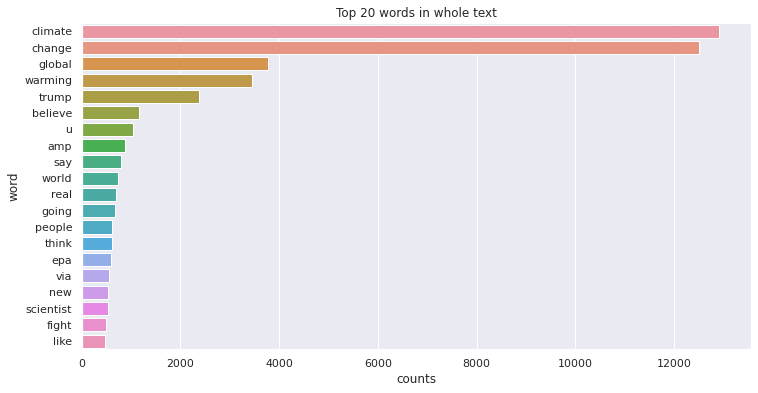

In [47]:
plt.figure(figsize=(12, 6))
sns.barplot(data=freq_words_df, x='counts', y='word')
plt.title('Top 20 words in whole text')
plt.show()

##Frequent words for each sentiment

In [48]:
# Frequent words for each sentiment
def freq_sentiment_words(text, sentiment, num):
    '''
        take the whole data, and return data which is have # of words in each sentiment has been passed
    '''
    words = [word for sent in text[text['sentiment'] == sentiment]
             ['clean_message'] for word in sent.split()]
    freq_words = Counter(words)
    freq_words_sorted = sorted(
        freq_words.items(), key=lambda pair: pair[1], reverse=True)
    freq_words_df = pd.DataFrame(
        freq_words_sorted[:num], columns=['word', 'counts'])
    return freq_words_df


In [49]:
def plot_freq(data, st):
    '''
        take the data, and st refeere to kind of sentiment
    '''
    plt.figure(figsize=(12, 6))
    sns.barplot(data=data, x='counts', y='word')
    plt.title(f'Top {st} words')
    plt.show()

      word  counts
0  climate    7340
1   change    7126
2   global    1593
3  warming    1439
4    trump    1084


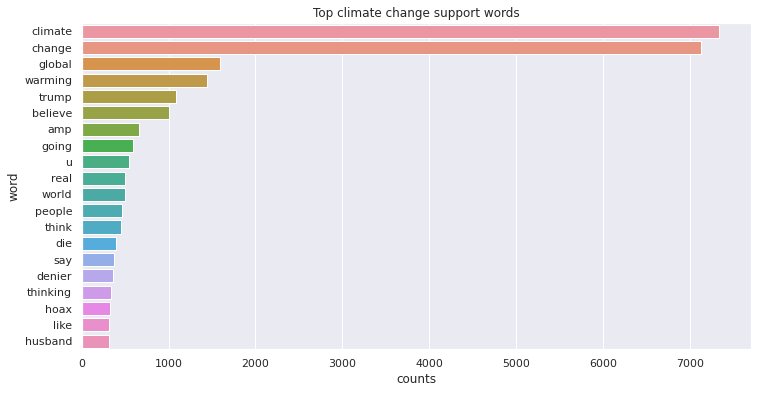

In [50]:
# In Positive Sentiment
positive_words = freq_sentiment_words(train_df, 1, 20)
print(positive_words.head())
plot_freq(positive_words, 'climate change support')

      word  counts
0  climate    3346
1   change    3258
2    trump    1064
3   global     507
4  warming     442


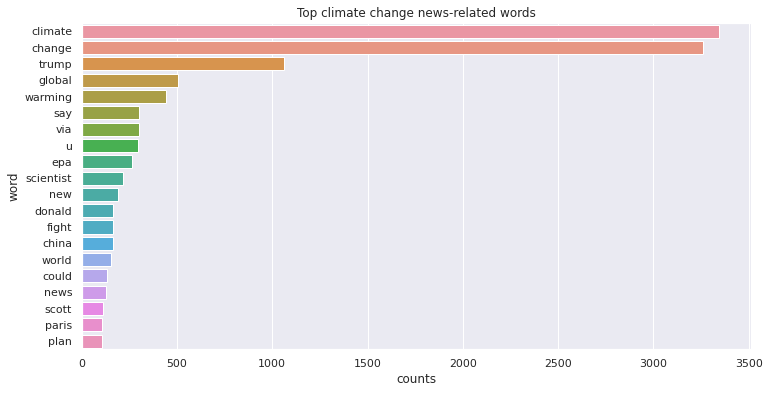

In [51]:
# In News Sentiment
positive_words = freq_sentiment_words(train_df, 2, 20)
print(positive_words.head())
plot_freq(positive_words, 'climate change news-related')

      word  counts
0  climate    1438
1   change    1386
2   global    1037
3  warming     971
4    trump     173


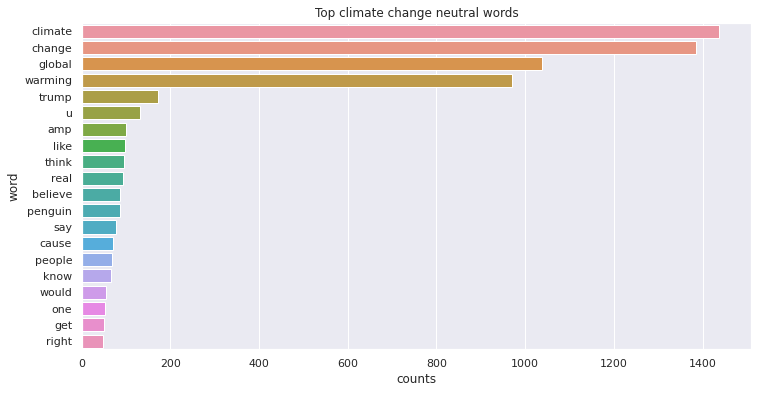

In [52]:
# In Neutral Sentiment
positive_words = freq_sentiment_words(train_df, 0, 20)
print(positive_words.head())
plot_freq(positive_words, 'climate change neutral')

      word  counts
0  climate     792
1   change     742
2   global     634
3  warming     604
4      amp      84


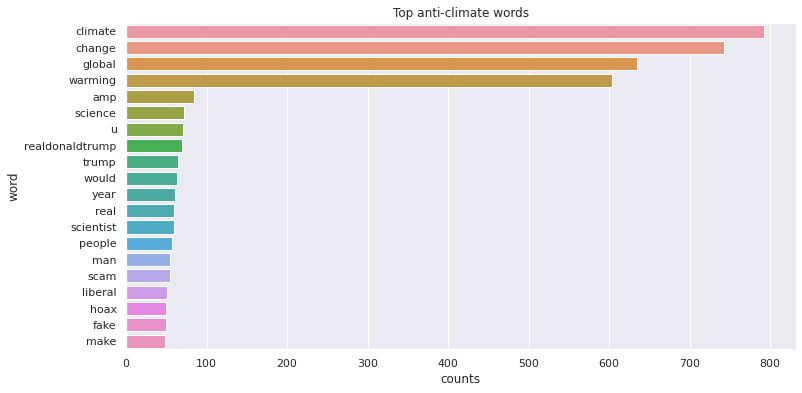

In [53]:
# In Anti Sentiment
positive_words = freq_sentiment_words(train_df, -1, 20)
print(positive_words.head())
plot_freq(positive_words, 'anti-climate')

In [54]:
# getting list of support climate change words
positive_text_clean = train_df[train_df['sentiment'] == 1]['clean_message']
positive_clean_words = [
    word for words in positive_text_clean for word in words.split()]
positive_clean_words[:10]

['polyscimajor',
 'epa',
 'chief',
 'think',
 'carbon',
 'dioxide',
 'main',
 'cause',
 'global',
 'warming']

In [55]:
# getting list of anti climate change words
negative_text_clean = train_df[train_df['sentiment'] == -1]['clean_message']
negative_clean_words = [word for words in negative_text_clean for word in words.split()]
negative_clean_words[:10]

['sally',
 'kohns',
 'latest',
 'evidence',
 'climate',
 'change',
 'prof',
 'smaperson',
 'via',
 'twitchyteam']

In [56]:
# getting list of neutral climate change words
neutral_text_clean = train_df[train_df['sentiment'] == 0]['clean_message']
neutral_clean_words = [word for words in neutral_text_clean for word in words.split()]
neutral_clean_words[:10]

['calum',
 'tweet',
 'abt',
 'reunitingish',
 'w',
 'castsees',
 'reply',
 'begging',
 'come',
 'countriescalum']

In [57]:
# getting list of news-related climate change words
news_text_clean = train_df[train_df['sentiment'] == 2]['clean_message']
news_clean_words = [
    word for words in news_text_clean for word in words.split()]
news_clean_words[:10]

['rawstory',
 'researcher',
 'say',
 'three',
 'year',
 'act',
 'climate',
 'change',
 'late',
 'tveitdal']

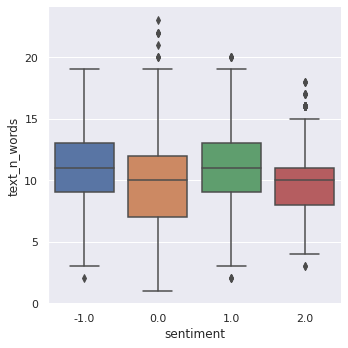

In [58]:
#Distribution of words sentiment
sns.catplot(x="sentiment", y="text_n_words", kind="box", data=train_df)

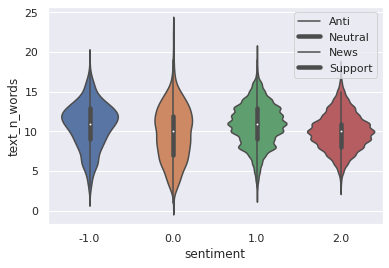

In [59]:
sns.violinplot(x='sentiment', y='text_n_words', data=train_df)
plt.legend(labels=['Anti', 'Neutral', 'News', 'Support'])

### WordCloud 

Text(0.5, 1.0, 'News Text')

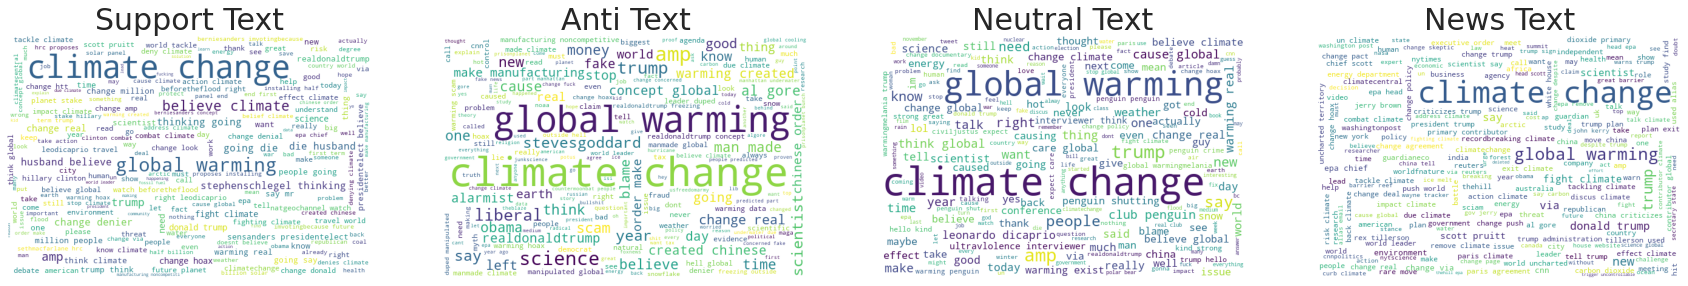

In [60]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=[30, 15])

wordcloud1 = WordCloud(background_color='white',
                       width=600,
                       height=400).generate(" ".join(positive_clean_words))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Support Text', fontsize=30)

wordcloud2 = WordCloud(background_color='white',
                       width=600,
                       height=400).generate(" ".join(negative_clean_words))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Anti Text', fontsize=30)

wordcloud3 = WordCloud(background_color='white',
                       width=600,
                       height=400).generate(" ".join(neutral_clean_words))
ax3.imshow(wordcloud3)
ax3.axis('off')
ax3.set_title('Neutral Text', fontsize=30)

wordcloud4 = WordCloud(background_color='white',
                       width=600,
                       height=400).generate(" ".join(news_clean_words))
ax4.imshow(wordcloud4)
ax4.axis('off')
ax4.set_title('News Text', fontsize=30)

<a id="one"></a>
## 5.0 Dealing with Imbalanced Data
<a href=#cont>Back to Table of Contents</a>

---
    
 Notes: The Problem with Class Imbalance for most machine learning algorithms work best when the number of samples in each class are about equal. This is because most algorithms are designed to maximize accuracy and reduce errors. We discovered upsampling, downsampling or both didn't have an impact on the accuracy of our model when it came to making predictions on the test data.

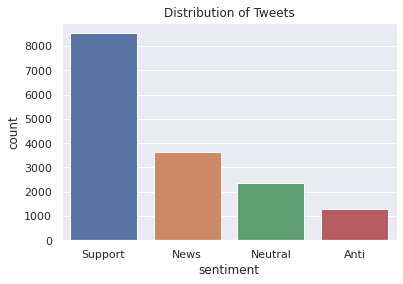

In [61]:
#Distribution of tweets
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="sentiment", data=train_df,
                order=train_df['sentiment'].value_counts().index)
ax.set(xticklabels = (['Support', 'News', 'Neutral', 'Anti']))
plt.title('Distribution of Tweets')
None #don't show the label objects

In [62]:
# Sentiment percentage of data before resampling.
# Separate minority and majority classes
news = train_df[train_df['sentiment']==2]
support = train_df[train_df['sentiment']==1]
neutral = train_df[train_df['sentiment']==0]
anti = train_df[train_df['sentiment']==-1]


print(f' Support: {round(len(support)/(len(train_df))*100, 2)} %')
print(f' News: {round(len(news)/(len(train_df))*100, 2)} %')
print(f' Neutral: {round(len(neutral)/(len(train_df))*100, 2)} %')
print(f' Anti: {round(len(anti)/(len(train_df))*100, 2)} %')

 Support: 53.92 %
 News: 23.01 %
 Neutral: 14.87 %
 Anti: 8.19 %


In [63]:
# Upsample minority and combine with majority
anti_upsampled = resample(anti, replace=True, n_samples= len(support), random_state=42)
neutral_upsampled = resample(neutral, replace=True, n_samples=len(support), random_state=42)
news_upsampled = resample(news, replace=True, n_samples=len(support), random_state=42)

sampled = pd.concat([neutral_upsampled, news_upsampled, anti_upsampled, support])

In [64]:
# Separate minority and majority classes
up_news = sampled[sampled['sentiment']==2]
up_support = sampled[sampled['sentiment']==1]
up_neutral = sampled[sampled['sentiment']==0]
up_anti = sampled[sampled['sentiment']==-1]

In [65]:
len(up_news), len(up_support), len(up_neutral), len(up_anti)

(8530, 8530, 8530, 8530)

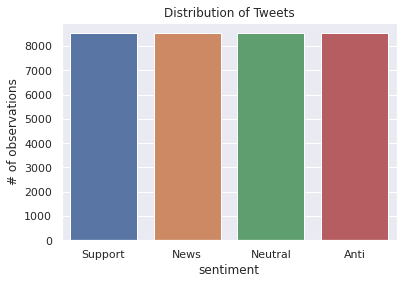

In [66]:
#Distribution of tweets
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="sentiment", data=sampled,
                order=train_df['sentiment'].value_counts().index)
ax.set(xticklabels = (['Support', 'News', 'Neutral', 'Anti']))
plt.ylabel("# of observations")
plt.title('Distribution of Tweets')
None #don't show the label objects

In [67]:
#Bag of Words
vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=10000, stop_words='english')
sampled_bow = vectorizer.fit_transform(sampled['message'])
sampled_bow.shape

(34120, 10000)

In [68]:
#TF-IDF
tv = TfidfVectorizer(min_df=2, max_df=0.90, max_features=10000, stop_words='english', ngram_range=(1,2))
tv.fit(sampled['clean_message'])

tv_train_transformed = tv.transform(sampled['clean_message'])
tv_cv = tv_train_transformed.toarray()

In [69]:
#Logistic Regression on Sampled Data

# Extracting train and test BoW features 
sampled_train = sampled_bow[:15819,:] 
sampled_test = sampled_bow[15819:,:]

# splitting data into training and validation set 
X_train, X_test, y_train, y_test = train_test_split(sampled_train, train['sentiment'], random_state=42, test_size=0.2)

lreg = LogisticRegression(solver='lbfgs') 

# training the model 
lreg.fit(X_train, y_train) 

LogisticRegression()

In [70]:
pred_y = lreg.predict(X_test) #Prediction of Test set
pred_y_train = lreg.predict(X_train) #Prediction of Train set
#Metrics
print('Train Accuracy', accuracy_score(y_train, pred_y_train))
print('Test Accuracy', accuracy_score(y_test, pred_y))
print('Classification Report')
print(classification_report(y_test, pred_y, target_names=['Anti', 'Neutral', 'Support', 'News']))

Train Accuracy 0.6318451205057289
Test Accuracy 0.46017699115044247
Classification Report
              precision    recall  f1-score   support

        Anti       0.10      0.03      0.04       278
     Neutral       0.13      0.06      0.09       425
     Support       0.55      0.75      0.64      1755
        News       0.20      0.14      0.16       706

    accuracy                           0.46      3164
   macro avg       0.25      0.25      0.23      3164
weighted avg       0.38      0.46      0.41      3164



In [71]:
#TF-IDF Sampled Data
sampled_train = tv_cv[:15819,:] 
sampled_test = tv_cv[15819:,:]

X_train, X_test, y_train, y_test = train_test_split(sampled_train, train['sentiment'], random_state=53, test_size=0.33)

td_lreg = LogisticRegression(solver='lbfgs') 

# training the model 
td_lreg.fit(X_train, y_train) 

LogisticRegression()

In [72]:
pred_y = td_lreg.predict(X_test) #Prediction of Test set
pred_y_train = td_lreg.predict(X_train) #Prediction of Train set
#Metrics
print('Train Accuracy', accuracy_score(y_train, pred_y_train))
print('Test Accuracy', accuracy_score(y_test, pred_y))
print('Classification Report')
print(classification_report(y_test, pred_y, target_names=['Anti', 'Neutral', 'Support', 'News']))

Train Accuracy 0.5837893942253255
Test Accuracy 0.5154185022026432
Classification Report
              precision    recall  f1-score   support

        Anti       0.00      0.00      0.00       434
     Neutral       0.17      0.01      0.02       782
     Support       0.54      0.92      0.68      2817
        News       0.23      0.07      0.10      1188

    accuracy                           0.52      5221
   macro avg       0.24      0.25      0.20      5221
weighted avg       0.37      0.52      0.39      5221



In [73]:
#Training on sampled data
# lreg = LogisticRegression(multi_class='ovr')

lreg = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# training the model 
lreg.fit(X_train, y_train) 


y_pred = lreg.predict(X_test) #Prediction of Test set
pred_y_train = lreg.predict(X_train) #Prediction of Train set
#Metrics
print('Train Accuracy', accuracy_score(y_train, pred_y_train))
print('Test Accuracy', accuracy_score(y_test, y_pred))
print('Classification Report' )
print(classification_report(y_test, y_pred, target_names=['Anti', 'Neutral', 'Support', 'News']))

Train Accuracy 0.5629364030949235
Test Accuracy 0.529400497988891
Classification Report
              precision    recall  f1-score   support

        Anti       0.00      0.00      0.00       434
     Neutral       0.33      0.01      0.01       782
     Support       0.54      0.97      0.69      2817
        News       0.23      0.03      0.06      1188

    accuracy                           0.53      5221
   macro avg       0.28      0.25      0.19      5221
weighted avg       0.39      0.53      0.39      5221



<a id="one"></a>
## 6.0 Feature Extraction
<a href=#cont>Back to Table of Contents</a>

---
    
Description: Feature engineering is a machine learning technique that leverages data to create new variables that aren't in the training set, with the goal of simplifying and speeding up data transformations while also enhancing model accuracy.

For this section, we created features using Bag of Words, TF-IDF, Word2Vec and Doc2Vec embedding and tested all four on the machine learning algorithms to see which method performed best.

###1. Bag-of-Words Features

In [145]:
# Hyper parametetr tuning
bow_vectorizer = CountVectorizer(analyzer='word',
                                 tokenizer=None,
                                 preprocessor=None,
                                 stop_words=None,
                                 max_features=180000,
                                 min_df=1,
                                 ngram_range=(1, 3))

bow = bow_vectorizer.fit_transform(combi['message'])
bow.shape

(26365, 180000)

In [74]:
# bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=10000, stop_words='english')
# bow = bow_vectorizer.fit_transform(combi['message'])
# bow.shape

(26365, 10000)

###2. TF-IDF Features

In [75]:
tv = TfidfVectorizer(min_df=2, max_df=0.90, max_features=10000, stop_words='english', ngram_range=(1,2))
tv.fit(combi['clean_message'])



TfidfVectorizer(max_df=0.9, max_features=10000, min_df=2, ngram_range=(1, 2),
                stop_words='english')

In [76]:
tv_train_transformed = tv.transform(combi['clean_message'])
tv_cv = tv_train_transformed.toarray()

In [77]:
train_tv_df = pd.DataFrame(tv_train_transformed.toarray(),
                     columns=tv.get_feature_names())\
                     .add_prefix('TFIDF_')

In [78]:
examine_row = train_tv_df.iloc[0]


In [79]:
print(examine_row.sort_values(ascending=False))

TFIDF_warming wait        0.319066
TFIDF_think carbon        0.311938
TFIDF_chief think         0.306004
TFIDF_dioxide main        0.300921
TFIDF_main cause          0.275135
                            ...   
TFIDF_people saying       0.000000
TFIDF_people say          0.000000
TFIDF_people predicted    0.000000
TFIDF_people like         0.000000
TFIDF_ab                  0.000000
Name: 0, Length: 10000, dtype: float64


In [80]:
out = train_tv_df.sum()

In [85]:
print(out.sort_values(ascending=False))

TFIDF_climate               1333.271176
TFIDF_change                1314.486416
TFIDF_climate change        1299.673270
TFIDF_global                 829.906121
TFIDF_warming                795.290208
                               ...     
TFIDF_kengarex                 1.112557
TFIDF_kengarex sculpture       1.112557
TFIDF_hey hit                  1.060760
TFIDF_hit good                 1.060760
TFIDF_news judge               1.060760
Length: 10000, dtype: float64


###3. Word2Vec Embedding

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import gensim

In [86]:
%%time
tokenized_text = combi['message'].apply(lambda x: x.split()) # tokenizing 

model_w2v = gensim.models.Word2Vec(
            tokenized_text,
            size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2, # Ignores all words with total frequency lower than 2.                                  
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 32, # no.of cores
            seed = 34
) 

model_w2v.train(tokenized_text, total_examples= len(combi['message']), epochs=20)


CPU times: user 2min 57s, sys: 654 ms, total: 2min 58s
Wall time: 1min 34s


In [87]:
model_w2v.wv.most_similar(positive="food")

[('production.', 0.6068077683448792),
 ('breakÃ¢â‚¬Â¦', 0.5915786027908325),
 ('Irresponsible', 0.590156614780426),
 ('#GAID2017', 0.577865481376648),
 ('supply', 0.5770965218544006),
 ('systems', 0.5760179758071899),
 ('supplies', 0.571953535079956),
 ('@Food_Tank:', 0.5680846571922302),
 ('#SDGs…', 0.5515517592430115),
 ('menu', 0.5485833883285522)]

In [88]:
model_w2v.most_similar(positive="u")

[('wonderful', 0.5537574291229248),
 ("Y'all", 0.545290470123291),
 ('niggas', 0.5426971912384033),
 ('ur', 0.5386404395103455),
 ('@SarahBaska:', 0.5346691608428955),
 ('😂😂', 0.5257787108421326),
 ('shirt', 0.519644021987915),
 ('him:', 0.5154174566268921),
 ('LOUD', 0.5153740048408508),
 ('democrat:', 0.5140645503997803)]

In [89]:
# model_w2v['heat']

In [90]:
len(model_w2v['heat']) #The length of the vector is 200

200

###Preparing Vectors for text

In [91]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError:  # handling the case where the token is not in vocabulary
            continue
    if count != 0:
        vec /= count
    return vec

In [92]:
wordvec_arrays = np.zeros((len(tokenized_text), 200)) 
for i in range(len(tokenized_text)):
    wordvec_arrays[i,:] = word_vector(tokenized_text[i], 200)
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(26365, 200)

###4. Doc2Vec Embedding

####To implement doc2vec, we have to labelise or tag each tokenised tweet with unique IDs. We can do so by using Gensim’s LabeledSentence() function.

In [93]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output

labeled_text = add_label(tokenized_text) # label all the tweets

In [94]:
labeled_text[:6]

[LabeledSentence(words=['PolySciMajor', 'EPA', 'chief', "doesn't", 'think', 'carbon', 'dioxide', 'is', 'main', 'cause', 'of', 'global', 'warming', 'and..', 'wait,', 'what!?', 'https://t.co/yeLvcEFXkC', 'via', '@mashable'], tags=['tweet_0']),
 LabeledSentence(words=["It's", 'not', 'like', 'we', 'lack', 'evidence', 'of', 'anthropogenic', 'global', 'warming'], tags=['tweet_1']),
 LabeledSentence(words=['RT', '@RawStory:', 'Researchers', 'say', 'we', 'have', 'three', 'years', 'to', 'act', 'on', 'climate', 'change', 'before', 'it’s', 'too', 'late', 'https://t.co/WdT0KdUr2f', 'https://t.co/Z0ANPT…'], tags=['tweet_2']),
 LabeledSentence(words=['#TodayinMaker#', 'WIRED', ':', '2016', 'was', 'a', 'pivotal', 'year', 'in', 'the', 'war', 'on', 'climate', 'change', 'https://t.co/44wOTxTLcD'], tags=['tweet_3']),
 LabeledSentence(words=['RT', '@SoyNovioDeTodas:', "It's", '2016,', 'and', 'a', 'racist,', 'sexist,', 'climate', 'change', 'denying', 'bigot', 'is', 'leading', 'in', 'the', 'polls.', '#Elect

##Now let’s train a doc2vec model.

In [95]:
%%time 
model_d2v = gensim.models.Doc2Vec(dm=1, # dm = 1 for ‘distributed memory’ model
                                  dm_mean=1, # dm_mean = 1 for using mean of the context word vectors
                                  vector_size=200, # no. of desired features
                                  window=5, # width of the context window                                  
                                  negative=7, # if > 0 then negative sampling will be used
                                  min_count=5, # Ignores all words with total frequency lower than 5.                                  
                                  workers=32, # no. of cores                                  
                                  alpha=0.1, # learning rate                                  
                                  seed = 23, # for reproducibility
                                 ) 

model_d2v.build_vocab([i for i in tqdm(labeled_text)])

model_d2v.train(labeled_text, total_examples= len(train['message']), epochs=15)

100%|██████████| 26365/26365 [00:00<00:00, 1674989.78it/s]


CPU times: user 1min 27s, sys: 21.8 s, total: 1min 49s
Wall time: 1min 18s


####Preparing doc2vec Feature Set

In [96]:
docvec_arrays = np.zeros((len(tokenized_text), 200)) 
for i in range(len(combi)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1, 200))    

docvec_df = pd.DataFrame(docvec_arrays) 
docvec_df.shape

(26365, 200)

In [97]:
docvec_df.shape,  wordvec_df.shape

((26365, 200), (26365, 200))

In [98]:
train.shape, test.shape

((15819, 3), (10546, 2))

In [99]:
# Extracting train and test BoW features 
train_bow = bow[:15819,:] 
test_bow = bow[15819:,:]

In [100]:
#Encoding
# le = LabelEncoder()
# Transforming categorical variable to label encoded form
# train['lang_id'] = le.fit_transform(train['lang_id'])
# data['lang_id'] = le.inverse_transform(data['lang_id'])
# data['lang_id'] 

 <a id="one"></a>
## 7.0 Modeling
<a href=#cont>Back to Table of Contents</a>

---
    
 Description: Done with all the pre-modeling stages required to get the data in the proper form and shape. We will be building models on the datasets with different feature sets prepared in the earlier sections — Bag-of-Words, TF-IDF, word2vec vectors, and doc2vec vectors. We will use the following algorithms to build models:


1.   Logistic Regression
2.   Support Vector Machine
3.   RandomForest
4.   XGBoost
5.   Multinomial Naive Bayes Classifier
6.   Linear Support Vector Classification

## 1.0 Logistic Regression

###Bag-of-Words Features







In [146]:
# Extracting train and test BoW features 
train_bow = bow[:15819,:] 
test_bow = bow[15819:,:]

# splitting data into training and validation set 
X_train, X_test, y_train, y_test = train_test_split(train_bow, train['sentiment'], random_state=42, test_size=0.2)

# lreg = LogisticRegression(solver='lbfgs')
# lreg = LogisticRegression(multi_class='ovr')
# LogisticRegression(multi_class='multinomial',solver='newton-cg')

lreg = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

# training the model 
lreg.fit(X_train, y_train) 

LogisticRegression(multi_class='ovr', solver='newton-cg')

In [147]:
y_pred = lreg.predict(X_test) #Prediction of Test set
pred_y_train = lreg.predict(X_train) #Prediction of Train set
#Metrics
print('Train Accuracy', accuracy_score(y_train, pred_y_train))
print('Test Accuracy', accuracy_score(y_test, y_pred))
print('Classification Report' )
print(classification_report(y_test, y_pred, target_names=['Anti', 'Neutral', 'Support', 'News']))

Train Accuracy 0.99723429474516
Test Accuracy 0.770543615676359
Classification Report
              precision    recall  f1-score   support

        Anti       0.78      0.47      0.59       278
     Neutral       0.60      0.48      0.53       425
     Support       0.79      0.88      0.83      1755
        News       0.79      0.80      0.79       706

    accuracy                           0.77      3164
   macro avg       0.74      0.65      0.69      3164
weighted avg       0.76      0.77      0.76      3164



In [103]:
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[ 120,   48,   92,   18],
       [  12,  205,  182,   26],
       [  20,  102, 1510,  123],
       [   4,   15,  139,  548]])

###Computing AUROC and ROC curve values


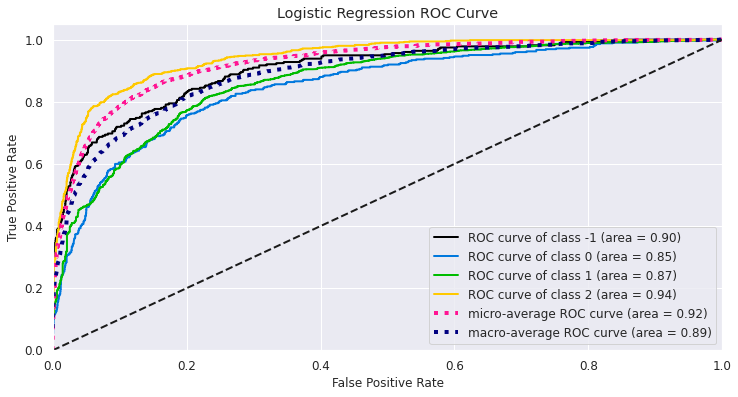

In [104]:
Y_test_probs = lreg.predict_proba(X_test)

skplt.metrics.plot_roc_curve(y_test, Y_test_probs,
                       title="Logistic Regression ROC Curve", figsize=(12,6));

### TF-ID Features

In [105]:
train_tf = tv_cv[:15819,:] 
test_tf = tv_cv[15819:,:]
# splitting data into training and validation set 
tX_train, tX_test, ty_train, ty_test = train_test_split(train_tf, train['sentiment'], random_state=53, test_size=0.33)

# td_lreg = LogisticRegression(solver='lbfgs')
td_lreg = LogisticRegression(multi_class='ovr')



# training the model 
td_lreg.fit(tX_train, ty_train) 

td_y_pred = td_lreg.predict(tX_test) # predicting

In [106]:
pred_y = td_lreg.predict(tX_test) #Prediction of Test set
pred_y_train = td_lreg.predict(tX_train) #Prediction of Train set
#Metrics
print('Train Accuracy', accuracy_score(ty_train, pred_y_train))
print('Test Accuracy', accuracy_score(ty_test, pred_y))
print('Classification Report', classification_report(ty_test, pred_y))

Train Accuracy 0.7953387431590866
Test Accuracy 0.700632062823214
Classification Report               precision    recall  f1-score   support

          -1       0.88      0.23      0.36       434
           0       0.65      0.28      0.39       782
           1       0.68      0.92      0.79      2817
           2       0.76      0.62      0.68      1188

    accuracy                           0.70      5221
   macro avg       0.74      0.51      0.56      5221
weighted avg       0.71      0.70      0.67      5221



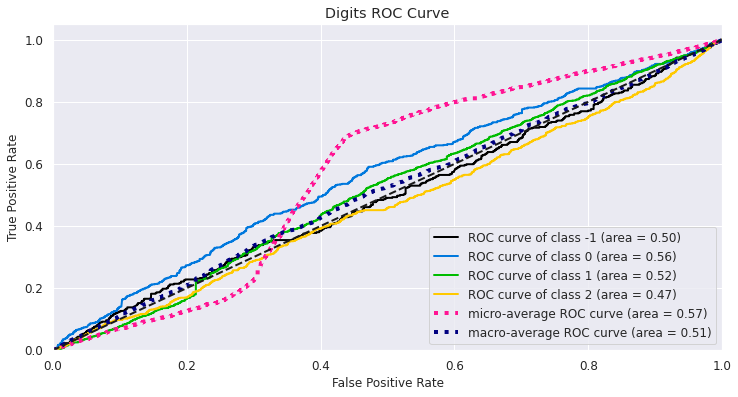

In [107]:
# ROC AUC Curve 
t_test_probs = lreg.predict_proba(tX_test)

skplt.metrics.plot_roc_curve(ty_test, t_test_probs,
                       title="Digits ROC Curve", figsize=(12,6));

###Word2Vec Features

In [108]:
# Extracting train and test Word2Vec features 
train_w2v = wordvec_df.iloc[:15819,:]
test_w2v = wordvec_df.iloc[15819:,:]

# splitting data into training and validation set 
wX_train, wX_test, wy_train, wy_test = train_test_split(train_w2v, train['sentiment'], random_state=42, test_size=0.2)

w_lreg = LogisticRegression(solver='lbfgs') 

# training the model 
w_lreg.fit(wX_train, wy_train) 

LogisticRegression()

In [109]:
pred_y = w_lreg.predict(wX_test) #Prediction of Test set
pred_y_train = w_lreg.predict(wX_train) #Prediction of Train set
#Metrics
print('Train Accuracy', accuracy_score(wy_train, pred_y_train))
print('Test Accuracy', accuracy_score(wy_test, pred_y))
print('Classification Report', classification_report(wy_test, pred_y))

Train Accuracy 0.7193994468589491
Test Accuracy 0.7155499367888748
Classification Report               precision    recall  f1-score   support

          -1       0.53      0.23      0.32       278
           0       0.56      0.40      0.46       425
           1       0.74      0.86      0.79      1755
           2       0.75      0.75      0.75       706

    accuracy                           0.72      3164
   macro avg       0.65      0.56      0.58      3164
weighted avg       0.70      0.72      0.70      3164



In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC

# Don't have to set `multi_class` argument if used with OVOClassifier
ovo = OneVsOneClassifier(estimator=GaussianProcessClassifier())

ovo.fit(wX_train, wy_train)
# OneVsOneClassifier(estimator=GaussianProcessClassifier())

###Doc2Vec Features

In [ ]:
# Extracting train and test Doc2Vec features 
train_d2v = docvec_df.iloc[:15819,:]
test_d2v = docvec_df.iloc[15819:,:]

# splitting data into training and validation set 
dX_train, dX_test, dy_train, dy_test = train_test_split(train_d2v, train['sentiment'], random_state=42, test_size=0.3)

d_lreg = LogisticRegression(solver='lbfgs') 

# training the model 
d_lreg.fit(dX_train, dy_train) 

# predicting
d_y_pred = d_lreg.predict(dX_test) 

In [ ]:
pred_y = d_lreg.predict(dX_test) #Prediction of Test set
pred_y_train = d_lreg.predict(dX_train) #Prediction of Train set
#Metrics
print('Train Accuracy', accuracy_score(dy_train, pred_y_train))
print('Test Accuracy', accuracy_score(dy_test, pred_y))
print('Classification Report', classification_report(dy_test, pred_y))

Train Accuracy 0.6165447484873114
Test Accuracy 0.6002949852507374
Classification Report               precision    recall  f1-score   support

          -1       0.45      0.12      0.20       401
           0       0.40      0.19      0.26       666
           1       0.63      0.83      0.72      2598
           2       0.58      0.46      0.51      1081

    accuracy                           0.60      4746
   macro avg       0.52      0.40      0.42      4746
weighted avg       0.57      0.60      0.56      4746



In [ ]:
#Tuning Logist Reg with TF-IDF
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

logreg_cv=GridSearchCV(logreg,grid,cv=10)

logreg_cv.fit(X_train ,y_train) #Fit Data

log_pred = logreg_cv.predict(X_test)
#Metrics
# print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, log_pred))
print(classification_report(y_test, log_pred))
# pd.crosstab(y_test,y_pred)

0.7531605562579013
              precision    recall  f1-score   support

          -1       0.77      0.43      0.55       278
           0       0.55      0.48      0.52       425
           1       0.79      0.86      0.82      1755
           2       0.77      0.78      0.77       706

    accuracy                           0.75      3164
   macro avg       0.72      0.64      0.67      3164
weighted avg       0.75      0.75      0.75      3164



#2. Support Vector Machine (SVM)


###Bag-of-Words Features

In [ ]:
svc = svm.SVC(kernel='linear', C=1, probability=True)
svc.fit(X_train, y_train) 
svc_y_pred = svc.predict(X_test) # predicting

In [ ]:
#Metrics
print(accuracy_score(y_test, svc_y_pred))
print(classification_report(y_test, svc_y_pred))

0.7187104930467763
              precision    recall  f1-score   support

          -1       0.61      0.51      0.55       278
           0       0.46      0.53      0.49       425
           1       0.79      0.79      0.79      1755
           2       0.75      0.75      0.75       706

    accuracy                           0.72      3164
   macro avg       0.65      0.64      0.65      3164
weighted avg       0.72      0.72      0.72      3164



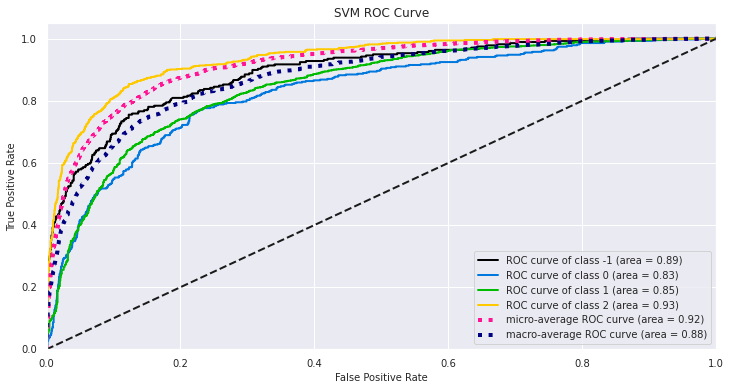

In [ ]:
# ROC AUC Curve 
y_test_probs = svc.predict_proba(X_test)

skplt.metrics.plot_roc_curve(y_test, y_test_probs,
                       title="SVM ROC Curve", figsize=(12,6));

###TF-IDF Features

In [ ]:
# training the model
t_svc = svm.SVC(kernel='linear', C=1, probability=True)
t_svc.fit(tX_train, ty_train)  
tsvc_y_pred = t_svc.predict(tX_test)

In [ ]:
#Metrics
print(accuracy_score(ty_test, svc_y_pred))
print(classification_report(ty_test, svc_y_pred))

0.6858407079646017
              precision    recall  f1-score   support

          -1       0.53      0.47      0.50       401
           0       0.45      0.51      0.48       666
           1       0.76      0.77      0.77      2598
           2       0.71      0.67      0.69      1081

    accuracy                           0.69      4746
   macro avg       0.61      0.60      0.61      4746
weighted avg       0.69      0.69      0.69      4746



###Word2Vec Features



In [ ]:
s_w_svc = svm.SVC(kernel='linear', C=1, probability=True) 

# training the model 
s_w_svc.fit(wX_train, wy_train)
s_y_pred = s_w_svc.predict(wX_test) # predicting

#Metrics
print(accuracy_score(wy_test, s_y_pred))
print(classification_report(wy_test, s_y_pred))

0.5474083438685209
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       401
           0       0.00      0.00      0.00       666
           1       0.55      1.00      0.71      2598
           2       0.00      0.00      0.00      1081

    accuracy                           0.55      4746
   macro avg       0.14      0.25      0.18      4746
weighted avg       0.30      0.55      0.39      4746



###Doc2Vec Features

In [ ]:
doc_svc = svm.SVC(kernel='linear', C=1, probability=True) 

# training the model 
doc_svc.fit(dX_train, dy_train)
doc_pred = doc_svc.predict(dX_test) # predicting

#Metrics
print(accuracy_score(dy_test, doc_pred))
print(classification_report(dy_test, doc_pred))

0.5474083438685209
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       401
           0       0.00      0.00      0.00       666
           1       0.55      1.00      0.71      2598
           2       0.00      0.00      0.00      1081

    accuracy                           0.55      4746
   macro avg       0.14      0.25      0.18      4746
weighted avg       0.30      0.55      0.39      4746



#3.0 RandomForest

###Bag of Words

In [123]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(X_train, y_train) 
prediction = rf.predict(X_test)


# rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
#                        criterion='gini', max_depth=None, max_features=5,
#                        max_leaf_nodes=None, max_samples=None,
#                        min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2,
#                        min_weight_fraction_leaf=0.0, n_estimators=500,
#                        n_jobs=None, oob_score=False, random_state=None,
#                        verbose=0, warm_start=False).fit(X_train, y_train)
prediction = rf.predict(X_test)

In [124]:
#Metrics
print(accuracy_score(y_test, prediction))
print(classification_report(y_test, prediction))

0.7032237673830595
              precision    recall  f1-score   support

          -1       0.68      0.26      0.37       278
           0       0.46      0.52      0.49       425
           1       0.74      0.82      0.78      1755
           2       0.77      0.70      0.73       706

    accuracy                           0.70      3164
   macro avg       0.66      0.57      0.59      3164
weighted avg       0.71      0.70      0.69      3164



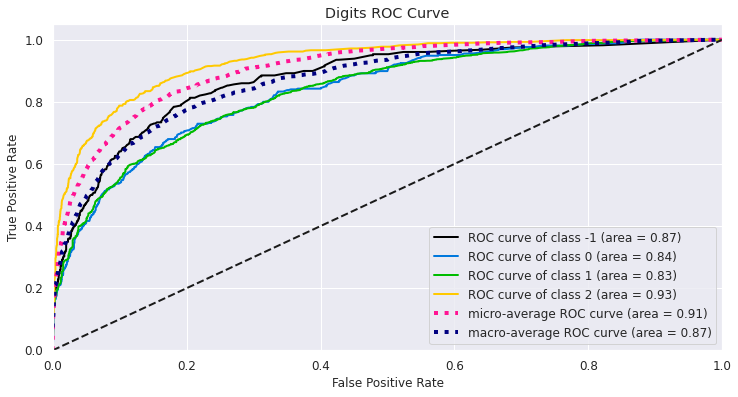

In [125]:
# ROC AUC Curve 
y_test_probs = rf.predict_proba(X_test)

skplt.metrics.plot_roc_curve(y_test, y_test_probs,
                       title="Digits ROC Curve", figsize=(12,6));

###TF-IDF Features

In [ ]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(tX_train, ty_train) 
prediction = rf.predict(tX_test)

In [ ]:
#Metrics
print(accuracy_score(ty_test, prediction))
print(classification_report(ty_test, prediction))

0.6820480404551201
              precision    recall  f1-score   support

          -1       0.73      0.27      0.40       401
           0       0.50      0.36      0.42       666
           1       0.71      0.85      0.77      2598
           2       0.68      0.63      0.66      1081

    accuracy                           0.68      4746
   macro avg       0.65      0.53      0.56      4746
weighted avg       0.67      0.68      0.66      4746



###Word2Vec Features

In [ ]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(wX_train, wy_train) 
prediction = rf.predict(wX_test)

In [ ]:
#Metrics
print(accuracy_score(wy_test, prediction))
print(classification_report(wy_test, prediction))

0.5474083438685209
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       401
           0       0.00      0.00      0.00       666
           1       0.55      1.00      0.71      2598
           2       0.00      0.00      0.00      1081

    accuracy                           0.55      4746
   macro avg       0.14      0.25      0.18      4746
weighted avg       0.30      0.55      0.39      4746



###Doc2Vec Features

In [ ]:
rf = RandomForestClassifier(n_estimators=400, random_state=11).fit(dX_train, dy_train) 
prediction = rf.predict(dX_test)

In [ ]:
#Metrics
print(accuracy_score(dy_test, prediction))
print(classification_report(dy_test, prediction))

0.5745891276864729
              precision    recall  f1-score   support

          -1       0.75      0.01      0.01       401
           0       0.56      0.02      0.04       666
           1       0.58      0.91      0.71      2598
           2       0.53      0.32      0.40      1081

    accuracy                           0.57      4746
   macro avg       0.61      0.32      0.29      4746
weighted avg       0.58      0.57      0.49      4746



#4.XGBoost


###Bag of Words Features

In [ ]:
# training the model 
# b_xgb_model = XGBClassifier(max_depth=6, n_estimators=1000)
b_xgb_model = XGBClassifier(multi='softmax', num_class=4)

b_xgb_model.fit(X_train, y_train)


XGBClassifier(multi='softmax', num_class=4, objective='multi:softprob')

In [ ]:
pred_y = b_xgb_model.predict(X_test) #Prediction of Test set
pred_y_train = b_xgb_model.predict(X_train) #Prediction of Train set
#Metrics
print('Train Accuracy', accuracy_score(y_train, pred_y_train))
print('Test Accuracy', accuracy_score(y_test, pred_y))
print('Classification Report', classification_report(y_test, pred_y))

Train Accuracy 0.6598182536546819
Test Accuracy 0.6624525916561315
Classification Report               precision    recall  f1-score   support

          -1       0.88      0.17      0.28       278
           0       0.68      0.19      0.30       425
           1       0.65      0.89      0.75      1755
           2       0.67      0.59      0.63       706

    accuracy                           0.66      3164
   macro avg       0.72      0.46      0.49      3164
weighted avg       0.68      0.66      0.62      3164



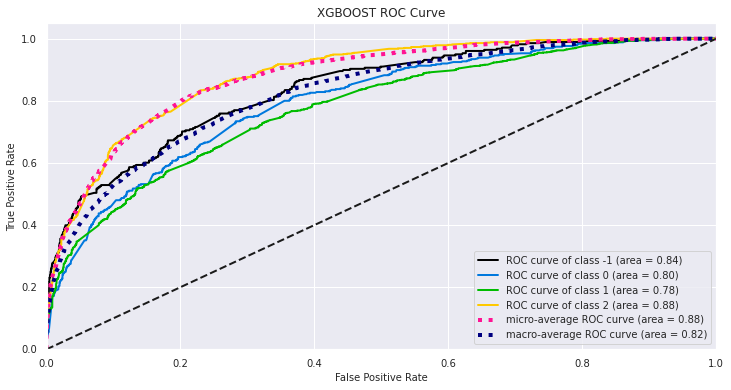

In [ ]:
# ROC AUC Curve 
y_test_probs = b_xgb_model.predict_proba(X_test)

skplt.metrics.plot_roc_curve(y_test, y_test_probs,
                       title="XGBOOST ROC Curve", figsize=(12,6));

###TF-IDF Features



In [ ]:
# training the model 
tf_xgb_model = XGBClassifier(multi='softmax', num_class=4)
tf_xgb_model.fit(tX_train, ty_train)

XGBClassifier(multi='softmax', num_class=4, objective='multi:softprob')

In [ ]:
pred_y = tf_xgb_model.predict(tX_test) #Prediction of Test set
pred_y_train = tf_xgb_model.predict(tX_train) #Prediction of Train set
#Metrics
print('Train Accuracy', accuracy_score(ty_train, pred_y_train))
print('Test Accuracy', accuracy_score(ty_test, pred_y))
print('Classification Report', classification_report(ty_test, pred_y))

Train Accuracy 0.6473862993017551
Test Accuracy 0.6326374257805019
Classification Report               precision    recall  f1-score   support

          -1       0.77      0.20      0.32       434
           0       0.57      0.22      0.31       782
           1       0.62      0.93      0.74      2817
           2       0.75      0.36      0.48      1188

    accuracy                           0.63      5221
   macro avg       0.68      0.43      0.46      5221
weighted avg       0.65      0.63      0.58      5221



###Word2Vec Features

In [ ]:
# training the model 
xgb = XGBClassifier()
xgb.fit(wX_train, wy_train) 

XGBClassifier(objective='multi:softprob')

In [ ]:
pred_y = xgb.predict(wX_test) #Prediction of Test set
pred_y_train = xgb.predict(wX_train) #Prediction of Train set
#Metrics
print('Train Accuracy', accuracy_score(wy_train, pred_y_train))
print('Test Accuracy', accuracy_score(wy_test, pred_y))
print('Classification Report', classification_report(wy_test, pred_y))

Train Accuracy 0.5353615171868826
Test Accuracy 0.554677623261694
Classification Report               precision    recall  f1-score   support

          -1       0.00      0.00      0.00       278
           0       0.00      0.00      0.00       425
           1       0.55      1.00      0.71      1755
           2       0.00      0.00      0.00       706

    accuracy                           0.55      3164
   macro avg       0.14      0.25      0.18      3164
weighted avg       0.31      0.55      0.40      3164



###Doc2Vec Features

In [ ]:
# # training the model 
# xgb_model = XGBClassifier(max_depth=6, n_estimators=1000)
# xgb_model.fit(dX_train, dy_train)
# prediction = xgb_model.predict(dX_test)

In [ ]:
#Metrics
print(accuracy_score(dy_test, prediction))
print(classification_report(dy_test, prediction))

0.7026970080067425
              precision    recall  f1-score   support

          -1       0.70      0.37      0.49       401
           0       0.58      0.38      0.46       666
           1       0.71      0.87      0.78      2598
           2       0.72      0.63      0.67      1081

    accuracy                           0.70      4746
   macro avg       0.68      0.56      0.60      4746
weighted avg       0.70      0.70      0.69      4746



###Tuning XBBOOST

In [ ]:
colsample_bytree = [0.3, 0.5, 1.0]
gamma = [0.1, 1, 1.5]
learning_rate = [0.001, 0.01]
min_child_weight = [1, 5, 10]
scale_pos_weight = [1, 2, 4]
subsample = [0.8, 0.9, 1.0]
n_estimators = [50, 100, 150]
max_depth = [5, 100]

param_grid = dict(
    colsample_bytree=colsample_bytree,
    gamma=gamma,
    learning_rate=learning_rate,
    min_child_weight=min_child_weight,
    scale_pos_weight=scale_pos_weight,
    subsample=subsample,
    n_estimators=n_estimators,
    max_depth=max_depth,
)

In [ ]:
model = XGBClassifier(random_state=1, verbosity=1)

grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           )
best_model = grid_search.fit(X_train, y_train)
print('Optimum parameters', best_model.best_params_)

In [ ]:
tuned_model = XGBClassifier(random_state=1, 
                            colsample_bytree=0.3, 
                            gamma=1, 
                            learning_rate=0.01, 
                            max_depth=5, 
                            min_child_weight=1,
                            n_estimators=100,
                            scale_pos_weight=2, 
                            subsample=0.9)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(tuned_model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC/AUC = ', scores.mean())

In [ ]:
# META CODE
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MultiLabelBinarizer
clf = OneVsRestClassifier(XGBClassifier(n_jobs=-1, max_depth=4))
clf.fit(X_train, y_train)

# 5. Multinomial Naive Bayes Classifier

####Bag of Words Features

In [ ]:

#Create MultinomialNB object
clf = MultinomialNB(alpha=0.6)
# Train clf
clf.fit(X_train, y_train)

MultinomialNB(alpha=0.6)

In [ ]:
pred_y = clf.predict(X_test) #Prediction of Test set
pred_y_train = clf.predict(X_train) #Prediction of Train set
#Metrics
print('Train Accuracy', accuracy_score(y_train, pred_y_train))
print('Test Accuracy', accuracy_score(y_test, pred_y))
print('Classification Report', classification_report(y_test, pred_y))

Train Accuracy 0.8456736467799288
Test Accuracy 0.7048040455120101
Classification Report               precision    recall  f1-score   support

          -1       0.56      0.47      0.51       278
           0       0.48      0.46      0.47       425
           1       0.79      0.76      0.78      1755
           2       0.68      0.80      0.73       706

    accuracy                           0.70      3164
   macro avg       0.63      0.62      0.62      3164
weighted avg       0.70      0.70      0.70      3164



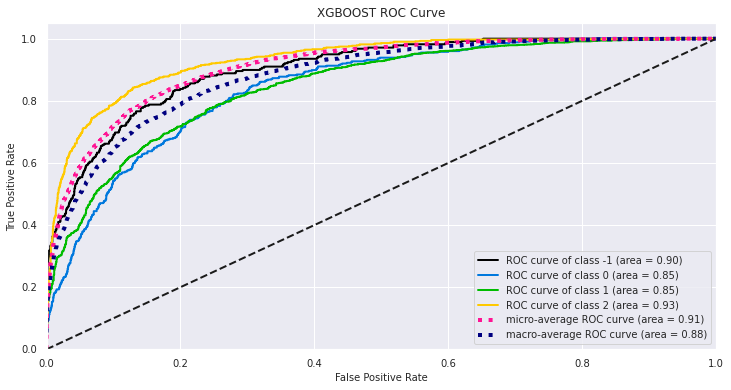

In [ ]:
# ROC AUC Curve 
y_test_probs = clf.predict_proba(X_test)

skplt.metrics.plot_roc_curve(y_test, y_test_probs,
                       title="XGBOOST ROC Curve", figsize=(12,6));

###TF-IDF Features

In [ ]:
tf_clf = MultinomialNB(alpha=0.6).fit(tX_train, ty_train)
# Train clf
tf_clf.fit(tX_train, ty_train)

MultinomialNB(alpha=0.6)

In [ ]:
pred_y = tf_clf.predict(tX_test) #Prediction of Test set
pred_y_train = tf_clf.predict(tX_train) #Prediction of Train set
#Metrics
print('Train Accuracy', accuracy_score(ty_train, pred_y_train))
print('Test Accuracy', accuracy_score(ty_test, pred_y))
print('Classification Report', classification_report(ty_test, pred_y))

Train Accuracy 0.7873183619550859
Test Accuracy 0.6925876268914001
Classification Report               precision    recall  f1-score   support

          -1       0.85      0.20      0.33       434
           0       0.64      0.22      0.33       782
           1       0.67      0.92      0.78      2817
           2       0.76      0.64      0.69      1188

    accuracy                           0.69      5221
   macro avg       0.73      0.50      0.53      5221
weighted avg       0.70      0.69      0.65      5221



###Word2Vec Features

In [ ]:
w_clf = MultinomialNB(alpha=0.6).fit(wX_train, wy_train)
# Compute Prediction
prediction = w_clf.predict(wX_test)

In [ ]:
pred_y = w_clf.predict(wX_test) #Prediction of Test set
pred_y_train = w_clf.predict(wX_train) #Prediction of Train set
#Metrics
print('Train Accuracy', accuracy_score(wy_train, pred_y_train))
print('Test Accuracy', accuracy_score(wy_test, pred_y))
print('Classification Report', classification_report(wy_test, pred_y))

Train Accuracy 0.5353615171868826
Test Accuracy 0.554677623261694
Classification Report               precision    recall  f1-score   support

          -1       0.00      0.00      0.00       278
           0       0.00      0.00      0.00       425
           1       0.55      1.00      0.71      1755
           2       0.00      0.00      0.00       706

    accuracy                           0.55      3164
   macro avg       0.14      0.25      0.18      3164
weighted avg       0.31      0.55      0.40      3164



# 6. Linear Support Vector Classifier

####Bag of Words Features

In [160]:
lsvc = LinearSVC()
lsvc.fit(X_train, y_train)

LinearSVC()

In [166]:
# Predicting values
y_pred = lsvc.predict(X_test) #Prediction of Test set
pred_y_train = lsvc.predict(X_train) #Prediction of Train set
#Metrics
print('Train Accuracy', accuracy_score(y_train, pred_y_train))
print('Test Accuracy', accuracy_score(y_test, y_pred))
print('Classification Report' )
print(classification_report(y_test, y_pred, target_names=['Anti', 'Neutral', 'Support', 'News']))

Train Accuracy 0.999446858949032
Test Accuracy 0.7597977243994943
Classification Report
              precision    recall  f1-score   support

        Anti       0.72      0.50      0.59       278
     Neutral       0.52      0.50      0.51       425
     Support       0.81      0.85      0.83      1755
        News       0.78      0.80      0.79       706

    accuracy                           0.76      3164
   macro avg       0.71      0.66      0.68      3164
weighted avg       0.76      0.76      0.76      3164



#Predict Test data for submission.


In [148]:
#To predict the test data for kaggle submission.
# final_pred = xgb.predict(test_w2v)

# final_pred = lreg.predict(test_bow) #BOW Logistic Reg

# final_pred = b_xgb_model.predict(test_tf) #BOW XGBOOST

# final_pred = td_lreg.predict(test_tf)#TF-IDF Logistic Reg

# final_pred = m.predict(test_bow) #BOW XGBOOST

#Multi-class
final_pred = lreg.predict(test_bow) #BOW 





#Saving Best Performing Models

In [ ]:
!python --version

Python 3.7.12


##Logistic Regression

In [149]:
#Save Model Logistic Regression With Pickle
import pickle
model_save_path = "logistic_model.pkl" #SVM
with open(model_save_path,'wb') as file:
    pickle.dump(lreg, file)


In [150]:
#Open Model With Pickle
model_load_path = "logistic_model.pkl"
with open(model_load_path,'rb') as file:
    log_unpickled_model = pickle.load(file)

In [151]:
# get predictions from unpickled model
log_pred = log_unpickled_model.predict(X_test)

In [ ]:
log_pred

array([1, 2, 1, ..., 1, 1, 1])

In [167]:
from google.colab import files
files.download("logistic_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##XGBOOST


In [ ]:
#Save Model XGBOOST With Pickle
import pickle

model_save_path = "xgb_model.pkl" #SVM
with open(model_save_path,'wb') as file:
    pickle.dump(xgb, file)


NameError: ignored

In [ ]:
#Save Model XGBOOST With Pickle (BOW)
import pickle

model_save_path = "xgb_model.pkl" #SVM
with open(model_save_path,'wb') as file:
    pickle.dump(b_xgb_model, file)

In [ ]:
#Open Model With Pickle
model_load_path = "xgb_model.pkl"
with open(model_load_path,'rb') as file:
    unpickled_model = pickle.load(file)

EOFError: ignored

In [ ]:
# get predictions from unpickled model
xgb_pred = unpickled_model.predict(wX_test)

 <a id="one"></a>
## 7.0 File Submission
<a href=#cont>Back to Table of Contents</a>

---
    
 Description: Generate and submit CSV file to Kaggle

In [ ]:
sub = pd.read_csv(url_sub)
sub.head()

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,1


In [153]:
# Create a submisison dataframe and append the relevant columns
submission = pd.DataFrame()
submission['tweetid'] = test['tweetid']
submission['sentiment'] = final_pred # our model predictions on the test dataset
submission.head()

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,0


In [154]:
# Let's convert our submission dataframe 'Survived' column to ints
submission['sentiment'] = submission['sentiment'].astype(int)
print('Converted Survived column to integers.')

Converted Survived column to integers.


In [155]:
# for Kaggle submisison
submission.to_csv('climate_change.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!


In [157]:
# Check the submission csv to make sure it's in the right format
submissions_check = pd.read_csv("climate_change.csv")
submissions_check.head()

,tweetid,sentiment
0,169760,1
1,35326,1
2,224985,1
3,476263,1
4,872928,0


In [158]:
submission.shape

(10546, 2)

In [159]:
from google.colab import files
files.download("climate_change.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>